In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip' -d '/content/drive/MyDrive'

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip, /content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip.zip or /content/drive/MyDrive/Colab Notebooks/Flowers-Dataset.zip.ZIP.


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = "/content/drive/MyDrive/flowers"
output = "/content/drive/MyDrive/flowers"
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.80,.20))

ValueError: ignored

In [ ]:
#To define linear intialisation import Sequential 
from keras.models import Sequential
#To add Layers import Dense
from keras.layers import Dense
#To create Convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten Layer
from keras.layers import Flatten
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Image Augmentation
import keras  
from keras.preprocessing.image import ImageDataGenerator
def getdata():
    train_datagen=ImageDataGenerator (rescale=1./255,
                                        shear_range=0.2,
                                        rotation_range=180,
                                        zoom_range=0.2,
                                        horizontal_flip=True)

    test_datagen=ImageDataGenerator (rescale=1./255)

    test_path = "/content/drive/MyDrive/flowers/test"

    train_path = "/content/drive/MyDrive/flowers/train"

    x_train = train_datagen.flow_from_directory(train_path,
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode= 'categorical')

    x_test = test_datagen.flow_from_directory(test_path,
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode= 'categorical')
    return x_train, x_test

In [ ]:
xtrain, xtest = getdata()

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
#model creation
model = Sequential()
model.add(Convolution2D(32,(2,2),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
#Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                        patience=5,
                        factor=0.5,min_lr=0.0001)

callback = [reduce_lr,early_stopping]

In [ ]:
# Fit model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/100
108/108 [==============================] - 290s 3s/step - loss: 1.1532 - accuracy: 0.5209 - val_loss: 1.1737 - val_accuracy: 0.5272 - lr: 0.0010
Epoch 2/100
108/108 [==============================] - 19s 179ms/step - loss: 1.0680 - accuracy: 0.5675 - val_loss: 0.9641 - val_accuracy: 0.6150 - lr: 0.0010
Epoch 3/100
108/108 [==============================] - 19s 178ms/step - loss: 1.0042 - accuracy: 0.5999 - val_loss: 1.0389 - val_accuracy: 0.6069 - lr: 0.0010
Epoch 4/100
108/108 [==============================] - 19s 179ms/step - loss: 0.9586 - accuracy: 0.6260 - val_loss: 1.1041 - val_accuracy: 0.6081 - lr: 0.0010
Epoch 5/100
108/108 [==============================] - 19s 178ms/step - loss: 0.9339 - accuracy: 0.6327 - val_loss: 0.9852 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/100
108/108 [==============================] - 20s 187ms/step - loss: 0.8925 - accuracy: 0.6527 - val_loss: 0.9930 - val_accuracy: 0.6035 - lr: 0.0010
Epoch 7/100
108/108 [===========================

In [ ]:
#save model
model.save('flower.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/flowers/test/rose/11233672494_d8bf0a3dbf_n.jpg',target_size=(64,64))

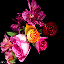

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x

In [ ]:
model.predict(x)

array([[1.0000000e+00, 0.0000000e+00, 1.2482715e-15, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [ ]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
op = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
pred = np.argmax(model.predict(x))
op[pred]

'daisy'